# Coronal slice and probe track

Connected to https://alyx.internationalbrainlab.org as mayo

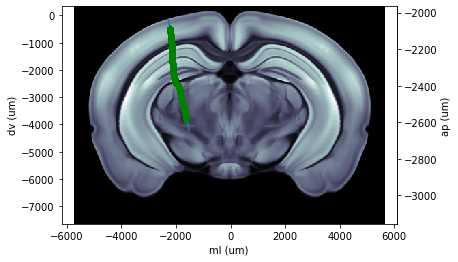

In [1]:
'''
Plot a coronal slice (best fit) that contains a given probe track.
As input, use an eID and probe label.
environment installation guide https://github.com/int-brain-lab/iblenv
'''
# Author: Olivier Winter

import numpy as np

import ibllib.atlas as atlas
from oneibl.one import ONE
import brainbox.io.one as bbone

# === Parameters section (edit) ===
eid = '614e1937-4b24-4ad3-9055-c8253d089919'
probe_label = 'probe01'
# === Code (do not edit) ===
ba = atlas.AllenAtlas(25)
one = ONE(base_url="https://alyx.internationalbrainlab.org")
one.path_from_eid(eid)
traj = one.alyx.rest('trajectories', 'list', session=eid,
                     provenance='Histology track', probe=probe_label)[0]
channels = bbone.load_channel_locations(eid=eid, one=one, probe=probe_label)

picks = one.alyx.rest('insertions', 'read', id=traj['probe_insertion'])['json']
picks = np.array(picks['xyz_picks']) / 1e6
ins = atlas.Insertion.from_dict(traj)

cax = ba.plot_tilted_slice(xyz=picks, axis=1, volume='image')
cax.plot(picks[:, 0] * 1e6, picks[:, 2] * 1e6)
cax.plot(channels[probe_label].x * 1e6, channels[probe_label].z * 1e6, 'g*')
